In [87]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')


In [2]:
epl_data = pd.read_csv('EPL_20_21.csv')
epl_data.head()


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


# Explore data


In [4]:
# check null value
epl_data.isnull().sum()


Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

In [5]:
epl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

In [7]:
epl_data.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,532.0,25.500000,4.319404,16.0,22.00,26.00,29.000,38.00
Matches,532.0,19.535714,11.840459,1.0,9.00,21.00,30.000,38.00
Starts,532.0,15.714286,11.921161,0.0,4.00,15.00,27.000,38.00
Mins,532.0,1411.443609,1043.171856,1.0,426.00,1345.00,2303.500,3420.00
Goals,532.0,1.853383,3.338009,0.0,0.00,1.00,2.000,23.00
Assists,532.0,1.287594,2.095191,0.0,0.00,0.00,2.000,14.00
Passes_Attempted,532.0,717.750000,631.372522,0.0,171.50,573.50,1129.500,3214.00
Perc_Passes_Completed,532.0,77.823872,13.011631,-1.0,73.50,79.20,84.625,100.00
Penalty_Goals,532.0,0.191729,0.850881,0.0,0.00,0.00,0.000,9.00
Penalty_Attempted,532.0,0.234962,0.975818,0.0,0.00,0.00,0.000,10.00


# 1. League analysis
The league analysis is all about various statistics and analysis pertaining to the english premier league as one of the most watched league in the world. You will see the attacking numbers, defensive statistics, international diversity and the violent side of the league making it an all round entertainer in any viewing angle of football fan.

In [12]:
goals = epl_data['Goals'].sum()

In [13]:
epl_data.shape

(532, 18)

In [16]:
print('In a league of '+str(epl_data.shape[0])+' registerd players, there was a total of '+str(goals)+' goals scored in the 2020/2021 season with an average of a goal in every game. '+str(epl_data['Penalty_Goals'].sum())+' out of such was scored by penalties.')

In a league of 532 registerd players, there was a total of 986 goals scored in the 2020/2021 season with an average of a goal in every game. 102 out of such was scored by penalties.


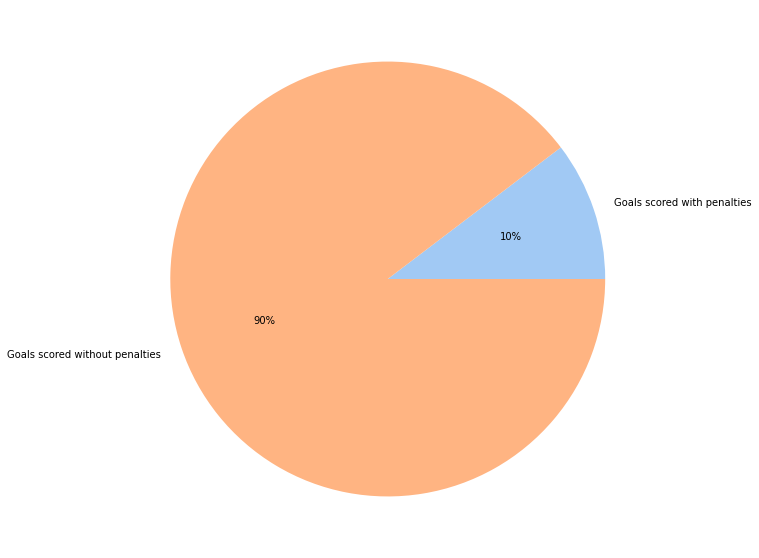

In [33]:
# Penalty percentage of the goals scored
goals_with_pk = epl_data['Penalty_Goals'].sum()
goals_without_pl = goals - goals_with_pk

plt.figure(figsize=(14,10))
data = goals_with_pk, goals_without_pl
labels = ['Goals scored with penalties', 'Goals scored without penalties']
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels=labels, colors=colors,autopct='%.0f%%')
plt.show()

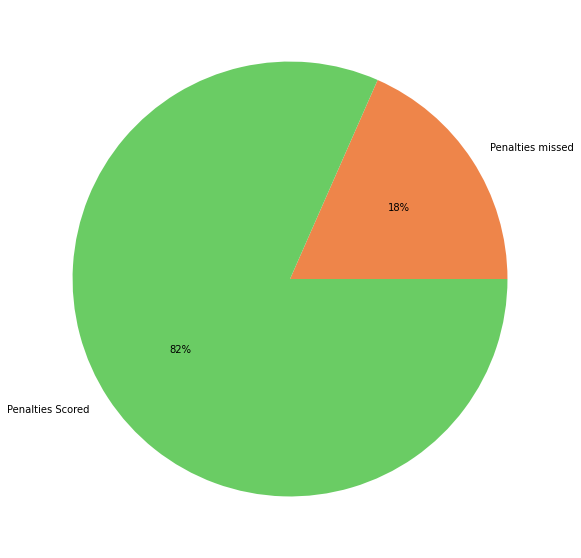

In [37]:
# Penalties scored and missed percentage
pk_not_scored = epl_data['Penalty_Attempted'].sum()-goals_with_pk
plt.figure(figsize=(14,10))
data = [pk_not_scored, goals_with_pk]
labels = ['Penalties missed','Penalties Scored']
colors = sns.color_palette('muted')[1:3]
plt.pie(data, labels=labels, colors=colors,autopct='%.0f%%')
plt.show()

The chart shows that 18% of the penalties awarded were either saved by a smart move from the epl goalkeepers or did not reach the intended target by the penalty taker. The 18% missed would have moved the epl goals to a thousand goal mark if scored.

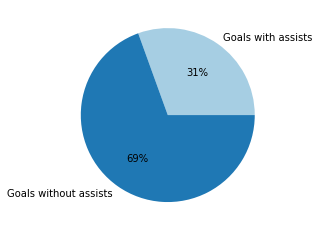

In [39]:
#Goals and assists percentage
assists = epl_data['Assists'].sum()
data = [goals-assists, assists]
labels = ['Goals with assists', 'Goals without assists']
colors = sns.color_palette('Paired')
plt.Figure(figsize=(14,10))
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%')
plt.show()

The chart shows that 31% dreamworks was not through teamwork as the major percentage of goals scored did not need that final man to make that decisive pass. Indeed, taking away the 69% of teamwork goals would reduce a huge chunk of the goals scored and making the league having a far less conversion rate.

In [40]:
countries = epl_data['Nationality'].unique()
print('There are '+str(len(countries))+' countries representing in the league including England. Let us use the relationshios between the various nationality mostly the goals and player involved ')

There are 59 countries representing in the league including England. Let us use the relationshios between the various nationality mostly the goals and player involved 


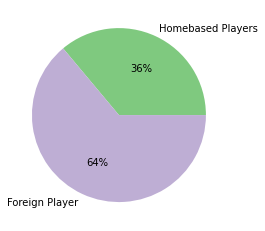

In [43]:
# percentage of home based players to foreign ones
homebased_players = (epl_data['Nationality']=='ENG').sum()
foreign_player = (epl_data['Nationality']!='ENG').sum()
plt.Figure(figsize=(14,10))
data = [homebased_players, foreign_player]
labels = ['Homebased Players','Foreign Player']
colors = sns.color_palette('Accent')
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%')
plt.show()

So 36% of the players in the english league are home based which proves that epl has done a great job in its diversity approach attracting players from all over world. 

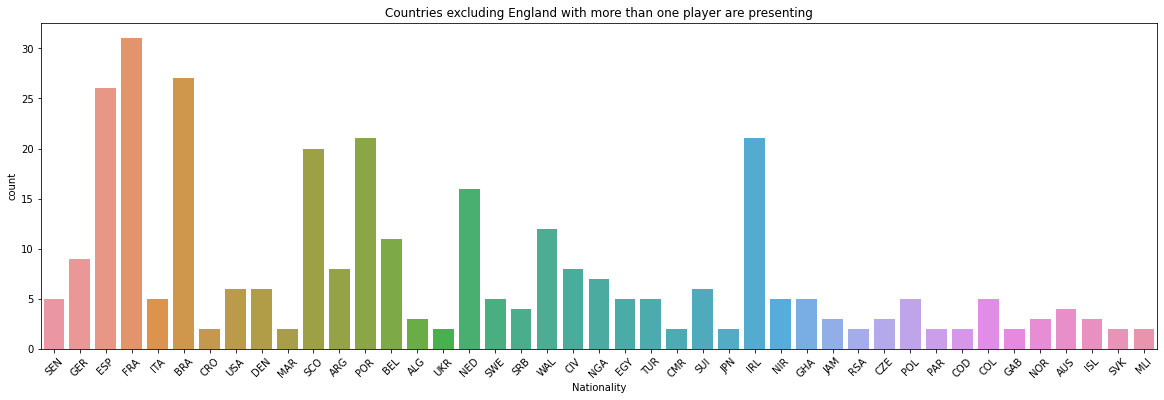

In [76]:
# countries are representing in England apart from the nation itself.
country_players = epl_data.groupby('Nationality').filter(lambda x: len(x)>1) #Countries with more than one player representing
eng_players = epl_data.loc[epl_data['Nationality']=='ENG'].index
country_exc_eng = country_players.drop(eng_players)

plt.figure(figsize=(20,6))
sns.countplot(x='Nationality', data=country_exc_eng)
plt.xticks(rotation=45)
plt.title('Countries excluding England with more than one player are presenting')
plt.show()

Out of 59 countries, France has the highest number of foreign players, boostering up to 32 players. Brazil and Spain coming second and third respectively with little edge over the other. Ivory Coast is the highest african country representing with up to 9 players while Japan is the highest for asia with up to 3 players

In [82]:
# the goal scoring countries
epl_data['Homebased']= np.NaN
cond = epl_data['Nationality']=='ENG'
epl_data['Homebased'] = epl_data['Homebased'].fillna(cond.map({True:'yes', False:'no'}))
epl_data.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Homebased
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,yes
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,no
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,no
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,yes
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,yes


<AxesSubplot:xlabel='Homebased', ylabel='Goals'>

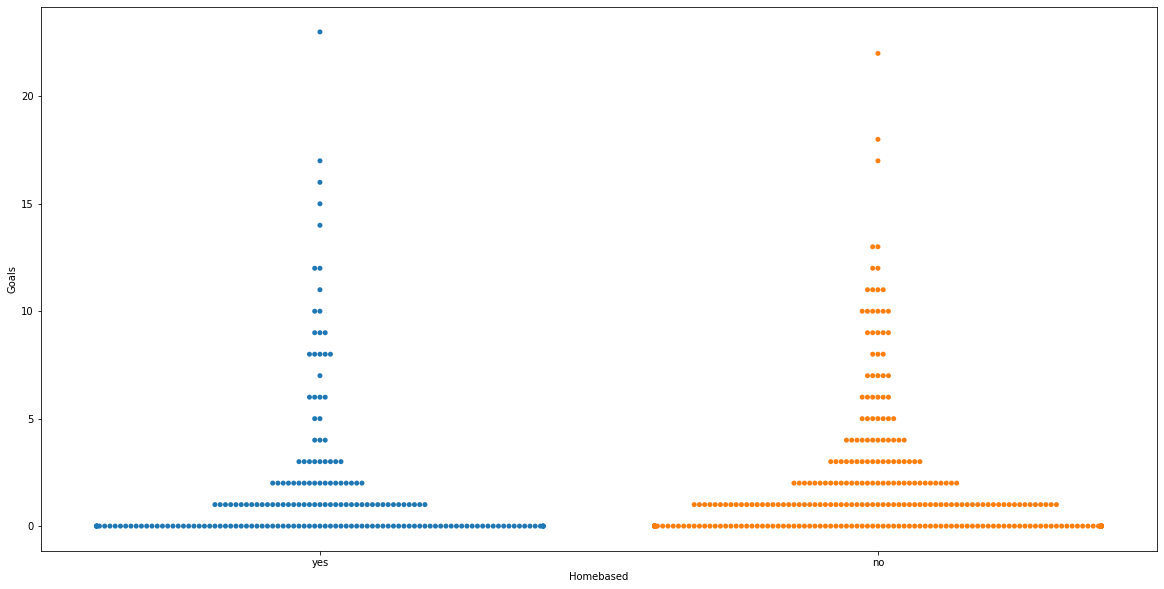

In [88]:
# Goals(Home or Foreign)
plt.figure(figsize=(20,10))
sns.swarmplot(x='Homebased', y='Goals', data=epl_data)


Guess the highest goal scorer is a homebased player second to a foreign one. 7 players reached the 15 goal mark with 3 players far from home (Spiderman thing!!). It also seem as though there were more foreign scorers than homebased ones as foreign players make up 64% of the players.

Text(0, 0.5, 'Goals')

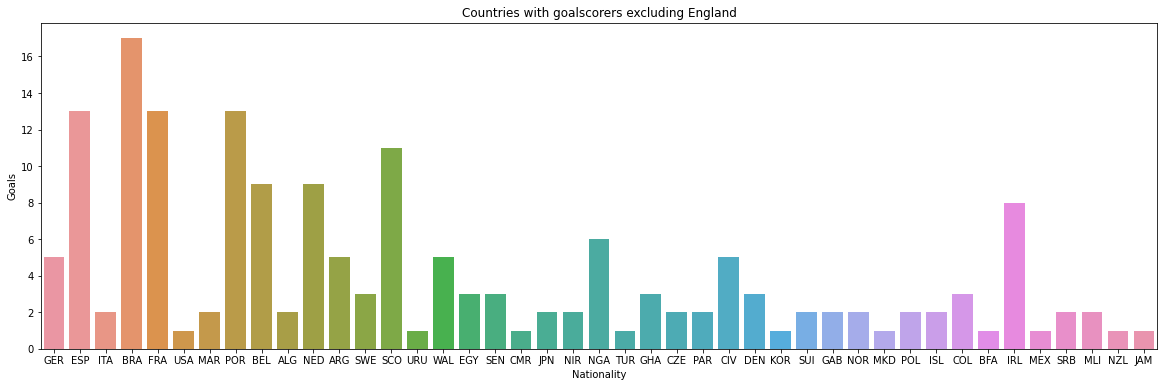

In [94]:
# Foreign countries with most goals
epl_without_eng = epl_data.drop(eng_players)
epl_wt_goals = epl_without_eng.loc[epl_without_eng['Goals']>0]
plt.figure(figsize=(20,6))
sns.countplot(x='Nationality', data=epl_wt_goals)
plt.title('Countries with goalscorers excluding England')
plt.ylabel('Goals')


The Samba boys from brazil has the highest number of foreign goalscorers with up to 17 goalscorers. There seem to be a three way tie between Spain, France and Portugal for second place with up to 13 goalscorers each. Nigeria is the african country with the highest number of goalscorers with up to 6 players hitting the back of the net while Japan is the highest for asia with up to 2 goalscorers.

In [95]:
#statistic other numbers
epl_data['Yellow_Cards'].sum()# number of yellow card

1125

In [96]:
epl_data['Red_Cards'].sum() # number of red card

48

In [97]:
epl_data.loc[(epl_data['Red_Cards']>0)]['Name'].count() # count players have red card

47

In [98]:
epl_data.loc[(epl_data['Red_Cards']>1)]['Name'].count() # count players have more than a red card

1

In [99]:
epl_data.loc[(epl_data['Yellow_Cards']==0)]['Name'].count() # count players do not have yellow card

174

In [100]:
epl_data.shape[0]

532

In [101]:
epl_data.loc[(epl_data['Yellow_Cards']==0)&(epl_data['Red_Cards']>0)]['Name'].count() # count player have red cards, but no yellow cards


4

In [102]:
epl_data.loc[(epl_data['Yellow_Cards']==0)&(epl_data['Red_Cards']==0)]['Name'].count() # count player do not have red cards and yellow cards

170

In [104]:
# rate of player do not have any cards
170/len(epl_data)*100

31.954887218045116

A total of 1125 yellow cards and 47 red cards were shown. 170 players were not booked which is up to 32% percent of the total numbers of players which is fair enough given how physical the league is. 4 players were not shown a yellow card but a red card and a player was shown a red card twice. 

Text(0, 0.5, 'Count')

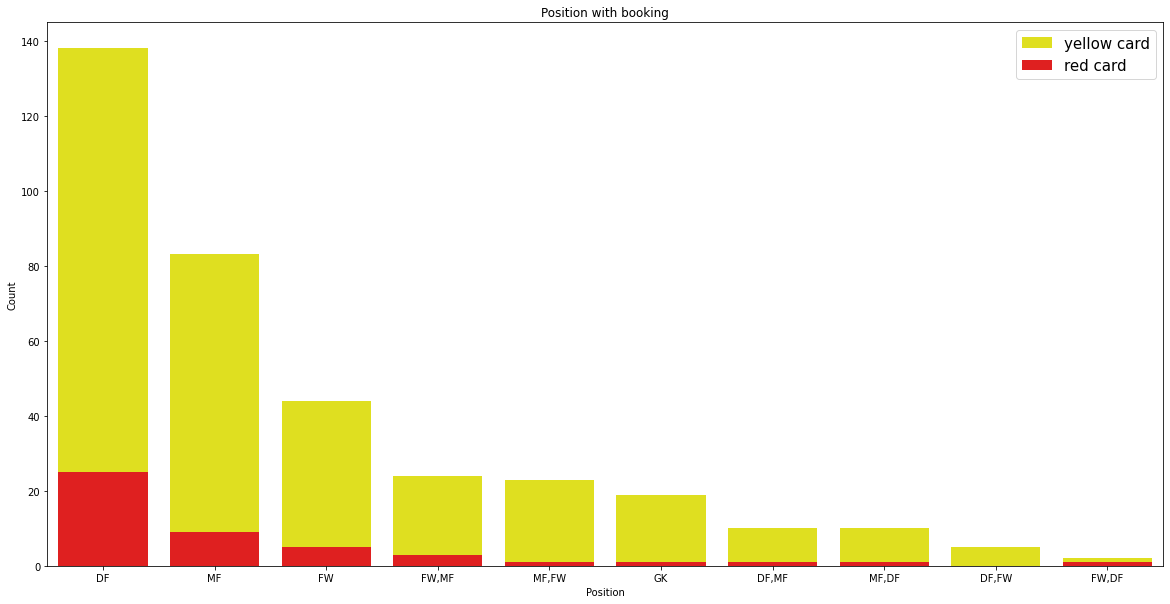

In [112]:
yellow_card = epl_data[epl_data['Yellow_Cards']>0]
red_card = epl_data[epl_data['Red_Cards']>0]

plt.figure(figsize=(20,10))
sns.countplot(x='Position', data=yellow_card, color='yellow', order=yellow_card['Position'].value_counts().index, label='yellow card')
sns.countplot(x='Position', data=red_card, color='red', order=yellow_card['Position'].value_counts().index, label='red card')
plt.title('Position with booking')
plt.legend(loc=1, prop={'size':15})
plt.ylabel('Count')

As expected, The defenders are the most booked in both red cards and yellow cards while those players who once played either a defender or a forward did not get sent-off throughout the season

# 2. Club analysis

<AxesSubplot:xlabel='Club', ylabel='Age'>

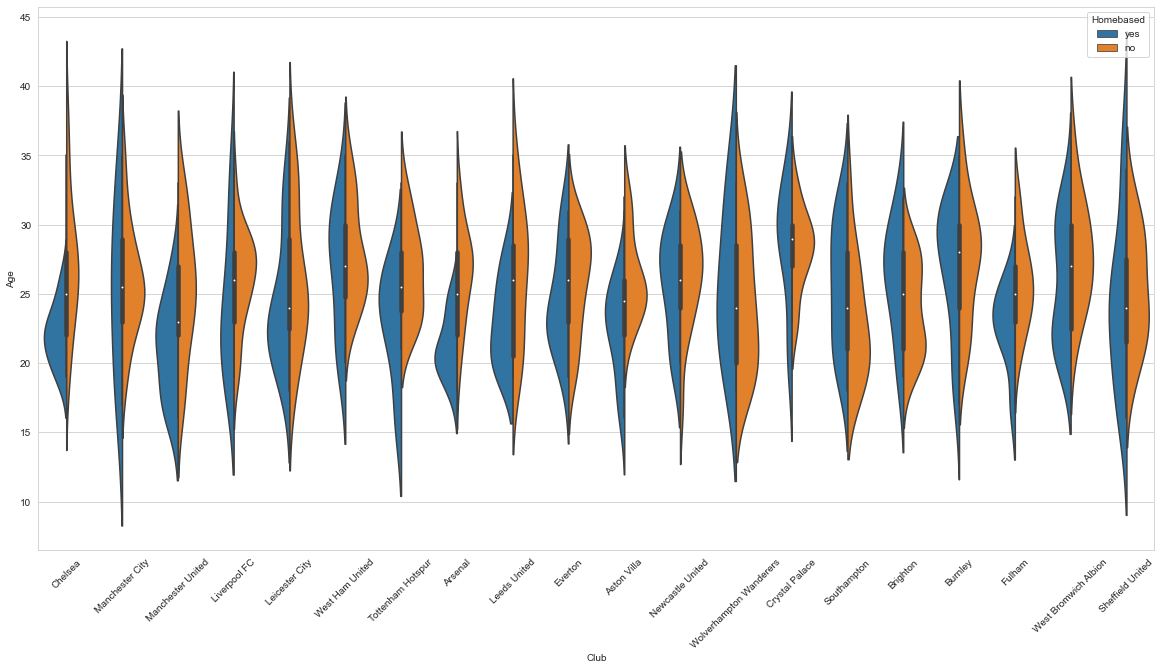

In [114]:
# Distribute of Ages by Clubs
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
ax = sns.violinplot(x='Club', y='Age', data=epl_data, hue='Homebased', split=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax

Chelsea has no homebased player more than 30 years of age while the foreign ones get to reach up to 40 so as Arsenal. Crystal place seem to have the highest mean age number of players with mean close to 30 years whil Manchester United has the least, lower than 25 years. Manchester City and Sheffield United seems to be the top two clubs with the most age variance for homebased players.

<AxesSubplot:title={'center':'Cummulative number of cards by club'}, xlabel='Club', ylabel='Sum'>

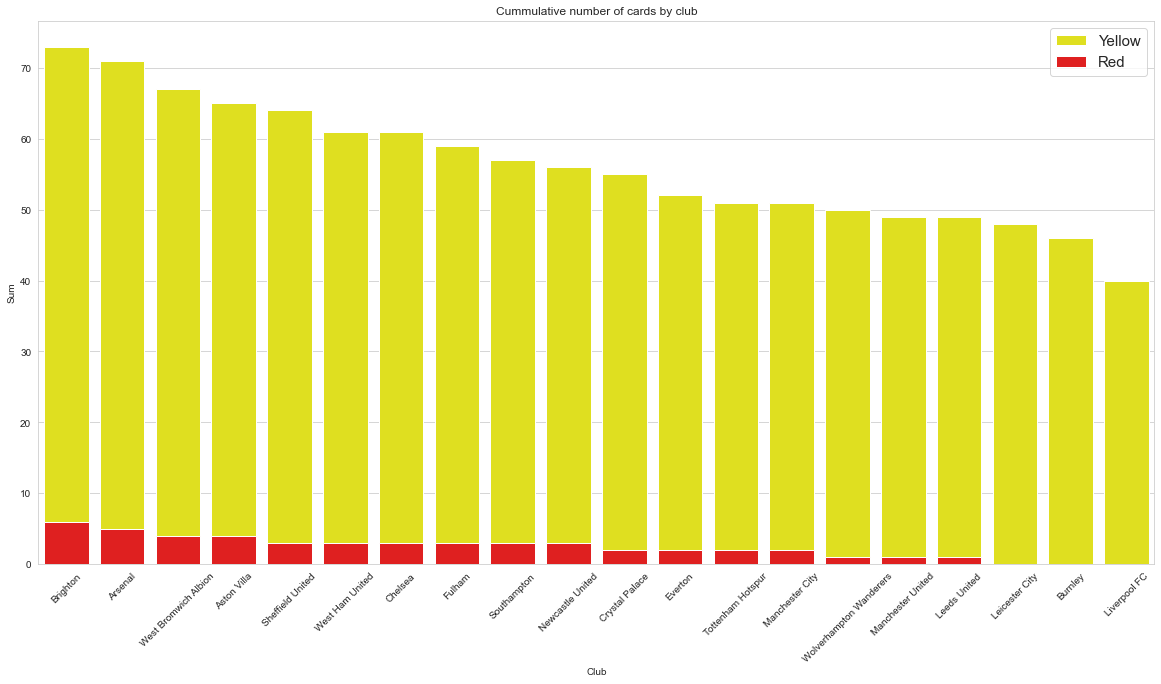

In [123]:
# cummulative number of cards by club throughout the season
yellow_bar = epl_data.groupby('Club')['Yellow_Cards'].sum().sort_values(ascending=False).to_frame()
red_bar = epl_data.groupby('Club')['Red_Cards'].sum().sort_values(ascending=False).to_frame()

plt.figure(figsize=(20,10))
ax1 = sns.barplot(x=yellow_bar.index, y=yellow_bar['Yellow_Cards'], color='yellow', label='Yellow')
ax2 = sns.barplot(x=red_bar.index, y=red_bar['Red_Cards'], color='red', label='Red')
plt.title('Cummulative number of cards by club')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
plt.ylabel('Sum')
plt.legend(loc=1, prop={'size':15})
ax1



Sheffield United was the most aggresive club on yellow cards while Liverpool was the least. Newcastle United, Crystal Palace and Wolves were the only team to escape a yellow card while Fulham had the highest number of red cards.

<AxesSubplot:title={'center':'Number of Goalscorers by Club'}, xlabel='Club', ylabel='Count'>

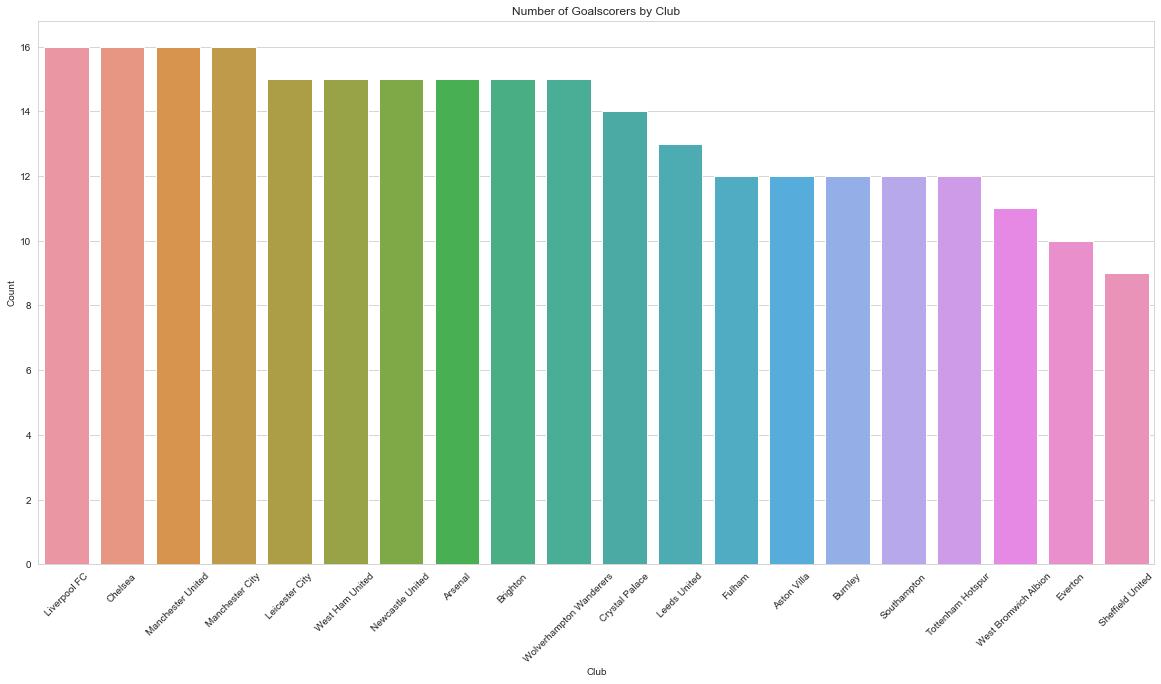

In [142]:
# Number of Goalscorers by Club
goal_clubs = epl_data.loc[epl_data['Goals']>0]['Goals'].groupby(epl_data['Club']).count().sort_values(ascending=False).to_frame()
plt.figure(figsize=(20,10))
ax = sns.barplot(x=goal_clubs.index, y=goal_clubs['Goals'], label='Goalscorers')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Number of Goalscorers by Club')
plt.ylabel('Count')
ax

Seems Liverpool, Chelsea and the two Manchester clubs shared the goals among themselves than any other team unlike their fellow big 6, Tottenham, who were among the least

<AxesSubplot:title={'center':"Every Club's Highest Goalscorer"}, xlabel='Name', ylabel='Number of Goals'>

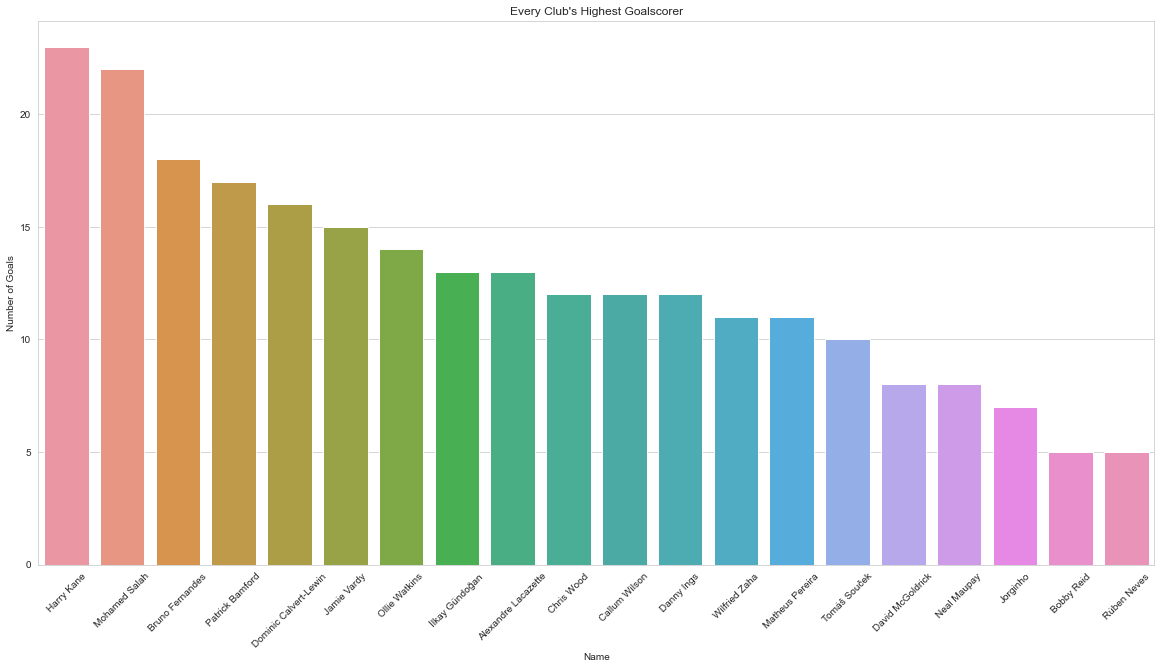

In [160]:
# clubs and their highest goalscorers
def getGoalscorer(row):
    name = epl_data.loc[row.Goals]['Name']
    return name 

def getHowMany (row):
    goals = epl_data.loc[row.Goals]['Goals']
    return goals 
goal_perclub=epl_data['Goals'].groupby(epl_data['Club']).idxmax().to_frame()

goal_perclub['Name'] = goal_perclub.apply(getGoalscorer, axis=1)
goal_perclub['Goals'] = goal_perclub.apply(getHowMany, axis=1)
goal_perclub.set_index('Name', inplace = True)
goal_perclub.sort_values('Goals', inplace=True, ascending=False)
goal_clubs.head()

plt.figure(figsize=(20,10))
ax = sns.barplot(x=goal_perclub.index, y=goal_perclub['Goals'], label='Goalscorers')
plt.title("Every Club's Highest Goalscorer")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.ylabel('Number of Goals')
ax


Jorginho as Chelsea's highest goalscorer with less than 10 goals and I am so sure almost all came from penalty kicks. But one thing to figure out here is that they need a goalscorer, one to give you Harry Kane, Salah kind of goals if they are to compete for the league next season. Gundogan for Manchester City seems fair enough given that Pep rotates his squad often. Harry Kane is the Tottenham and EPL highest goalscorer surpassing the 20-goal mark with Salah.

<AxesSubplot:title={'center':"Every Club's Highest Goalscorer"}, xlabel='Name', ylabel='Number of Goals'>

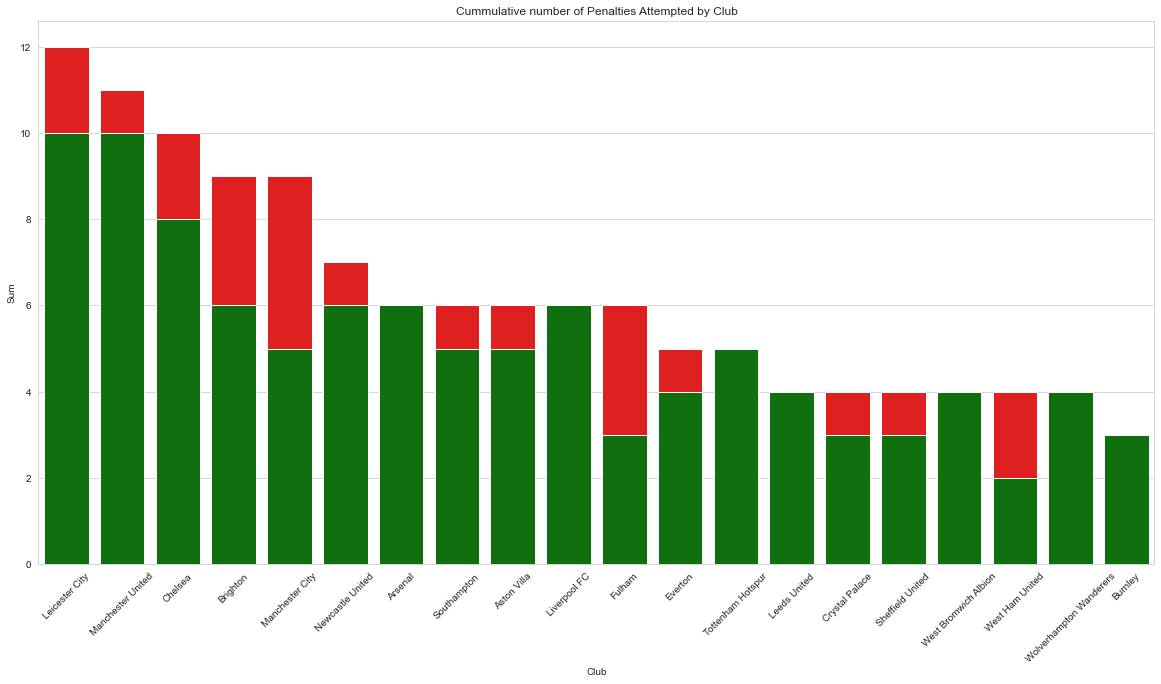

In [167]:
# passes and penalty kicks.
pk_clubs = epl_data.groupby(epl_data['Club'])['Penalty_Attempted'].sum().sort_values(ascending=False).to_frame()
pk_get = epl_data.groupby(epl_data['Club'])['Penalty_Goals'].sum().sort_values(ascending=False).to_frame()

plt.figure(figsize=(20,10))
ax1 = sns.barplot(x=pk_clubs.index, y= pk_clubs['Penalty_Attempted'], color='red', label='Attempted')
ax2 = sns.barplot(x=pk_get.index, y= pk_get['Penalty_Goals'], order=pk_clubs.index, color='green', label='Scored')
plt.title('Cummulative number of Penalties Attempted by Club')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
plt.ylabel('Sum')
ax


Leciester City has the most penalty awarded also having the most converted alongside Manchester United. Arsenal, Liverpool, Tottenham, Leeds, Westbrom, Wolves and Burnley have all had a 100% penalty conversion rate while Mancity and Fulham has missed a huge percentage of penalties taken.

In [ ]:
# Passes Attempted by Clubs
